In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.layers import Input,Dense, Dropout
from keras.models import Model,Sequential
from sklearn.metrics import roc_curve, auc
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_mutual_info_score,adjusted_rand_score,v_measure_score, completeness_score, homogeneity_score, silhouette_score,roc_curve, auc, f1_score, precision_recall_curve, precision_score,recall_score,accuracy_score,confusion_matrix
from utils import * 

### Link to Paper

https://arxiv.org/pdf/1809.10717.pdf

In [9]:
DATA_DIR = '/Users/PeterC/Documents/gt/practicum/autoencoders/data/'
DATA_DIR = '/Users/chenpete/Documents/ESP/practicum/autoencoders/data/'

non_scale_cols = ['time','y_early','y_rank','y_count','y']
param_cols = [
        'x1', 'x2', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x9',
       'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16', 'x17', 'x18', 'x19',
       'x20', 'x21', 'x22', 'x23', 'x24', 'x25', 'x26', 'x27', 'x28', 'x29',
       'x30', 'x31', 'x32', 'x33', 'x34', 'x35', 'x36', 'x37', 'x38', 'x39',
       'x40', 'x41', 'x42', 'x43', 'x44', 'x45', 'x46', 'x47', 'x48', 'x49',
       'x50', 'x51', 'x52', 'x53', 'x54', 'x55', 'x56', 'x57', 'x58', 'x59',
       'x60','x61']

y_col = 'y_early'
early_step = 4

df = pd.read_csv(DATA_DIR + 'paper_mill_rare_events.csv')
df['time'] = pd.to_datetime(df['time'])
X_train, X_test, y_train, y_test,y_rank_train, y_rank_test,y_count_train, y_count_test = preprocess_paper_mill_data(df,param_cols,y_col, non_scale_cols,early_step)

# Model 1: Layer autoencoder

In [19]:
model = simple_ann_autoencoder_regression(param_cols)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 32)                1984      
_________________________________________________________________
dense_10 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_11 (Dense)             (None, 32)                544       
_________________________________________________________________
dense_12 (Dense)             (None, 61)                2013      
Total params: 5,069
Trainable params: 5,069
Non-trainable params: 0
_________________________________________________________________


In [20]:
history_callback = model.fit(X_train,X_train,epochs=30,batch_size = 32)
loss_history = history_callback.history['loss']

Epoch 1/30
16007/16007 [==============================] - 1s 41us/step - loss: 0.4609
Epoch 2/30
16007/16007 [==============================] - 0s 27us/step - loss: 0.2385
Epoch 3/30
16007/16007 [==============================] - 0s 28us/step - loss: 0.1989
Epoch 4/30
16007/16007 [==============================] - 0s 27us/step - loss: 0.1775
Epoch 5/30
16007/16007 [==============================] - 0s 27us/step - loss: 0.1634
Epoch 6/30
16007/16007 [==============================] - 0s 28us/step - loss: 0.1526
Epoch 7/30
16007/16007 [==============================] - 0s 28us/step - loss: 0.1441
Epoch 8/30
16007/16007 [==============================] - 0s 26us/step - loss: 0.1369
Epoch 9/30
16007/16007 [==============================] - 0s 24us/step - loss: 0.1292
Epoch 10/30
16007/16007 [==============================] - 0s 24us/step - loss: 0.1231
Epoch 11/30
16007/16007 [==============================] - 0s 24us/step - loss: 0.1180
Epoch 12/30
16007/16007 [===========================

In [21]:
model.save('autoencoder_32_16_32.h5')

Text(0.5, 1.0, 'loss history')

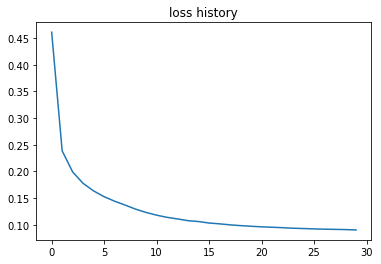

In [22]:
plt.plot(loss_history)
plt.title('loss history')

In [23]:
X_pred_test = model.predict(X_test)

X_pred_train = model.predict(X_train)

df_results_test = results_df(X_test,X_pred_test,y_test,y_rank_test,y_count_test)
df_results_train = results_df(X_train,X_pred_train,y_train,y_rank_train,y_count_train)

## Assess errors for each time lag

In [24]:
res_nominal_train = df_results_train[df_results_train['y'] == 0]['residual_avg']

average_res_nominal_train = np.mean(res_nominal_train)
std_res_nominal_train = np.std(res_nominal_train)
threshold_3s = average_res_nominal_train + 3*std_res_nominal_train
threshold_5s = average_res_nominal_train + 5*std_res_nominal_train
threshold_max = np.max(res_nominal_train)

threshold_list = [('3s',threshold_3s),('5s',threshold_5s),('max',threshold_max)]

### Training residuals

(0, 1)

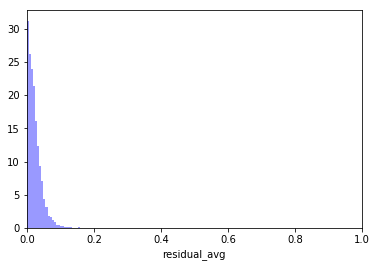

In [25]:
plt.figure()
sns.distplot(df_results_train['residual_avg'],norm_hist=True,kde=False,color='blue')
plt.xlim((0,1))


------------------ early time step of 1----------------------------


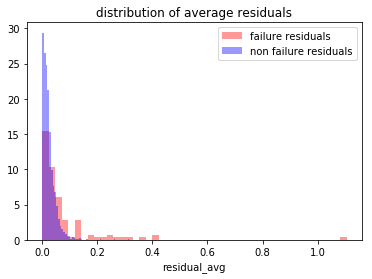

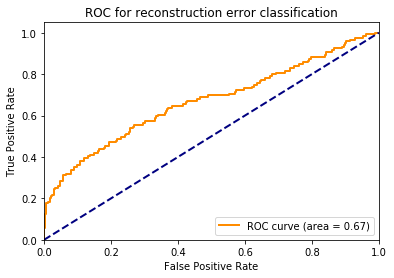



------ Using threshold 3s---------------
accuracy = 0.933
precision = 0.421
recall = 0.202
f1 = 0.273


------ Using threshold 5s---------------
accuracy = 0.941
precision = 0.640
recall = 0.134
f1 = 0.222


------ Using threshold max---------------
accuracy = 0.939
precision = 0.714
recall = 0.042
f1 = 0.079

------------------ early time step of 2----------------------------


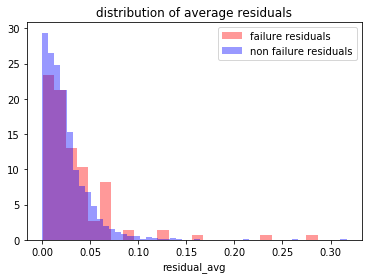

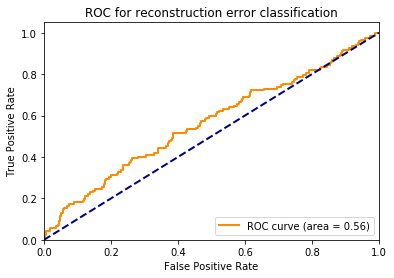



------ Using threshold 3s---------------
accuracy = 0.922
precision = 0.154
recall = 0.049
f1 = 0.075


------ Using threshold 5s---------------
accuracy = 0.933
precision = 0.250
recall = 0.025
f1 = 0.045


------ Using threshold max---------------
accuracy = 0.935
precision = 0.000
recall = 0.000
f1 = 0.000

------------------ early time step of 3----------------------------


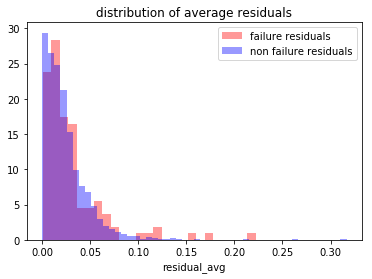

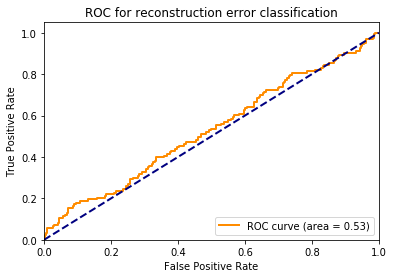



------ Using threshold 3s---------------
accuracy = 0.922
precision = 0.175
recall = 0.057
f1 = 0.086


------ Using threshold 5s---------------
accuracy = 0.932
precision = 0.250
recall = 0.024
f1 = 0.044


------ Using threshold max---------------
accuracy = 0.934
precision = 0.000
recall = 0.000
f1 = 0.000

------------------ early time step of 4----------------------------


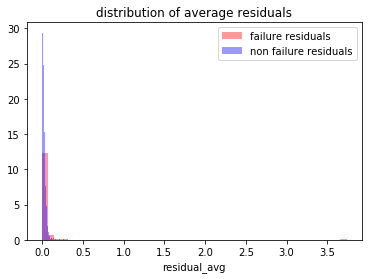

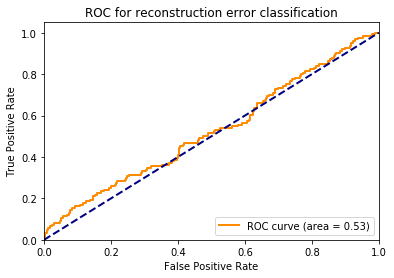



------ Using threshold 3s---------------
accuracy = 0.921
precision = 0.175
recall = 0.056
f1 = 0.085


------ Using threshold 5s---------------
accuracy = 0.932
precision = 0.308
recall = 0.032
f1 = 0.058


------ Using threshold max---------------
accuracy = 0.934
precision = 0.333
recall = 0.008
f1 = 0.016

------------------ early time step of 5----------------------------


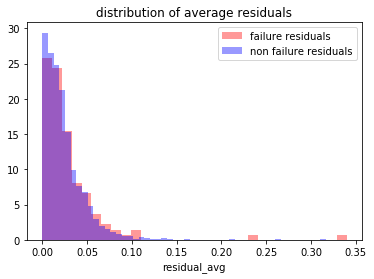

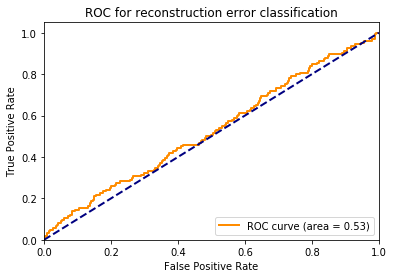



------ Using threshold 3s---------------
accuracy = 0.921
precision = 0.154
recall = 0.048
f1 = 0.074


------ Using threshold 5s---------------
accuracy = 0.931
precision = 0.182
recall = 0.016
f1 = 0.030


------ Using threshold max---------------
accuracy = 0.934
precision = 0.333
recall = 0.008
f1 = 0.016


In [26]:
for rank in range(1,np.max(df_results_test['y_rank'])+1):
    
    print('\n------------------ early time step of {}----------------------------'.format(rank))
    
    df_results_rank= df_results_test[(df_results_test['y_rank']==rank) | (df_results_test['y_rank']==0)]
    res_nominal_test = df_results_rank[df_results_rank['y'] == 0]['residual_avg']
    res_failures_test = df_results_rank[df_results_rank['y_rank'] == rank]['residual_avg']
    
    plt.figure()
    sns.distplot(res_failures_test,norm_hist=True,kde=False,color='red')
    sns.distplot(res_nominal_test,norm_hist=True,kde=False,color='blue')
    plt.legend(['failure residuals','non failure residuals'])
    plt.title('distribution of average residuals')

    y_true = np.array(df_results_rank['y'])
    y_pred_proba = np.array(df_results_rank['residual_avg']/np.max(df_results_rank['residual_avg']))

    plot_roc(y_true,y_pred_proba)
    
    for name,threshold in threshold_list:
        print('\n\n------ Using threshold {}---------------'.format(name))
        y_pred_threshold = np.where(df_results_rank['residual_avg'] > threshold, 1, 0)
        
        print('accuracy = {:.3f}'.format(accuracy_score(y_true,y_pred_threshold)))
        print('precision = {:.3f}'.format(precision_score(y_true,y_pred_threshold)))
        print('recall = {:.3f}'.format(recall_score(y_true,y_pred_threshold)))
        print('f1 = {:.3f}'.format(f1_score(y_true,y_pred_threshold)))


(0, 0.75)

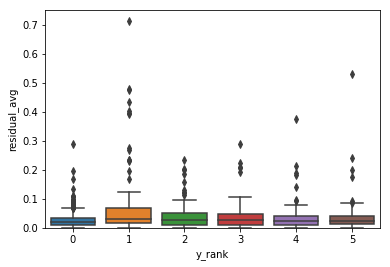

In [91]:
sns.boxplot(x='y_rank',y='residual_avg',data=df_results_test)
plt.ylim((0,.75))